In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
!git clone https://github.com/GuidoBergman/reliable-ai.git

Cloning into 'reliable-ai'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
Receiving objects: 100% (28/28), 1.94 MiB | 2.08 MiB/s, done.
remote: Total 28 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Resolving deltas: 100% (19/19), done.


In [2]:
df_claude_mono=pd.read_csv("/kaggle/working/reliable-ai/monolithic_anthropic_anthropic_claude-3-5-haiku-latest.csv")
df_gpt_mono=pd.read_csv("/kaggle/working/reliable-ai/monolithic_openai_openai_gpt-4.1-nano.csv")
df_gemini_mono=pd.read_csv("/kaggle/working/reliable-ai/monolithic_gemini_gemini_gemini-2.0-flash.csv")

In [3]:
df_claude_judge_participant=pd.read_csv("/kaggle/working/reliable-ai/judge_participant_mode_anthropic_anthropic_claude-3-5-haiku-latest.csv")
df_gpt_judge_participant=pd.read_csv("/kaggle/working/reliable-ai/judge_participant_mode_openai_openai_gpt-4.1-nano.csv")
df_gemini_judge_participant=pd.read_csv("/kaggle/working/reliable-ai/judge_participant_mode_gemini_gemini_gemini-2.0-flash.csv")

In [4]:
df_claude_judge_evaluator=pd.read_csv("/kaggle/working/reliable-ai/judge_evaluator_only_mode_anthropic_anthropic_claude-3-5-haiku-latest.csv")
df_gpt_judge_evaluator=pd.read_csv("/kaggle/working/reliable-ai/judge_evaluator_only_mode_openai_openai_gpt-4.1-nano.csv")
df_gemini_judge_evaluator=pd.read_csv("/kaggle/working/reliable-ai/judge_evaluator_only_mode_gemini_gemini_gemini-2.0-flash.csv")

In [5]:
print(len(df_claude_mono))
print(len(df_gpt_mono))
print(len(df_gemini_mono))

600
600
600


In [6]:
print(len(df_claude_judge_participant))
print(len(df_gpt_judge_participant))
print(len(df_gemini_judge_participant))

600
600
600


In [7]:
print(len(df_claude_judge_evaluator))
print(len(df_gpt_judge_evaluator))
print(len(df_gemini_judge_evaluator))

600
600
600


In [8]:


# Function to calculate 95% confidence interval for proportion
def binomial_confidence_interval(successes, n, confidence=0.95):
    """Calculate confidence interval for binomial proportion using Clopper-Pearson method"""
    alpha = 1 - confidence
    lower = stats.beta.ppf(alpha/2, successes, n - successes + 1)
    upper = stats.beta.ppf(1 - alpha/2, successes + 1, n - successes)
    
    # Handle edge cases
    if successes == 0:
        lower = 0
    if successes == n:
        upper = 1
        
    return lower, upper

# Claude results
df_claude_mono["is_correct"] = df_claude_mono["correct_answer"] == df_claude_mono["selected_option"] 
df_claude_judge_participant["is_correct"] = df_claude_judge_participant["correct_answer"] == df_claude_judge_participant["selected_option"] 
df_claude_judge_evaluator["is_correct"] = df_claude_judge_evaluator["correct_answer"] == df_claude_judge_evaluator["selected_option"] 

n_samples = len(df_claude_mono)
acc_mono = np.mean(df_claude_mono["is_correct"])
acc_judge_participant = np.mean(df_claude_judge_participant["is_correct"])
acc_judge_evaluator = np.mean(df_claude_judge_evaluator["is_correct"])

# Calculate confidence intervals
ci_mono = binomial_confidence_interval(sum(df_claude_mono["is_correct"]), n_samples)
ci_judge_participant = binomial_confidence_interval(sum(df_claude_judge_participant["is_correct"]), n_samples)
ci_judge_evaluator = binomial_confidence_interval(sum(df_claude_judge_evaluator["is_correct"]), n_samples)

print(f"Claude-3.5-Haiku monolithic baseline accuracy: {acc_mono:.3%} (95% confidence interval: [{ci_mono[0]:.3%}, {ci_mono[1]:.3%}])")
print(f"Claude-3.5-Haiku judge as participant accuracy: {acc_judge_participant:.3%} (95% confidence interval: [{ci_judge_participant[0]:.3%}, {ci_judge_participant[1]:.3%}])")
print(f"Claude-3.5-Haiku judge as evaluator only accuracy: {acc_judge_evaluator:.3%} (95% confidence interval: [{ci_judge_evaluator[0]:.3%}, {ci_judge_evaluator[1]:.3%}])")

# GPT results
df_gpt_mono["is_correct"] = df_gpt_mono["correct_answer"] == df_gpt_mono["selected_option"] 
df_gpt_judge_participant["is_correct"] = df_gpt_judge_participant["correct_answer"] == df_gpt_judge_participant["selected_option"] 
df_gpt_judge_evaluator["is_correct"] = df_gpt_judge_evaluator["correct_answer"] == df_gpt_judge_evaluator["selected_option"] 

acc_mono = np.mean(df_gpt_mono["is_correct"])
acc_judge_participant = np.mean(df_gpt_judge_participant["is_correct"])
acc_judge_evaluator = np.mean(df_gpt_judge_evaluator["is_correct"])

# Calculate confidence intervals
ci_mono = binomial_confidence_interval(sum(df_gpt_mono["is_correct"]), n_samples)
ci_judge_participant = binomial_confidence_interval(sum(df_gpt_judge_participant["is_correct"]), n_samples)
ci_judge_evaluator = binomial_confidence_interval(sum(df_gpt_judge_evaluator["is_correct"]), n_samples)

print(f"GPT-4.1-nano monolithic baseline accuracy: {acc_mono:.3%} (95% confidence interval: [{ci_mono[0]:.3%}, {ci_mono[1]:.3%}])")
print(f"GPT-4.1-nano judge as participant accuracy: {acc_judge_participant:.3%} (95% confidence interval: [{ci_judge_participant[0]:.3%}, {ci_judge_participant[1]:.3%}])")
print(f"GPT-4.1-nano judge as evaluator only accuracy: {acc_judge_evaluator:.3%} (95% confidence interval: [{ci_judge_evaluator[0]:.3%}, {ci_judge_evaluator[1]:.3%}])")

# Gemini results
df_gemini_mono["is_correct"] = df_gemini_mono["correct_answer"] == df_gemini_mono["selected_option"] 
df_gemini_judge_participant["is_correct"] = df_gemini_judge_participant["correct_answer"] == df_gemini_judge_participant["selected_option"] 
df_gemini_judge_evaluator["is_correct"] = df_gemini_judge_evaluator["correct_answer"] == df_gemini_judge_evaluator["selected_option"] 

acc_mono = np.mean(df_gemini_mono["is_correct"])
acc_judge_participant = np.mean(df_gemini_judge_participant["is_correct"])
acc_judge_evaluator = np.mean(df_gemini_judge_evaluator["is_correct"])

# Calculate confidence intervals
ci_mono = binomial_confidence_interval(sum(df_gemini_mono["is_correct"]), n_samples)
ci_judge_participant = binomial_confidence_interval(sum(df_gemini_judge_participant["is_correct"]), n_samples)
ci_judge_evaluator = binomial_confidence_interval(sum(df_gemini_judge_evaluator["is_correct"]), n_samples)

print(f"Gemini-2.0-Flash monolithic baseline accuracy: {acc_mono:.3%} (95% confidence interval: [{ci_mono[0]:.3%}, {ci_mono[1]:.3%}])")
print(f"Gemini-2.0-Flash judge as participant accuracy: {acc_judge_participant:.3%} (95% confidence interval: [{ci_judge_participant[0]:.3%}, {ci_judge_participant[1]:.3%}])")
print(f"Gemini-2.0-Flash judge as evaluator only accuracy: {acc_judge_evaluator:.3%} (95% confidence interval: [{ci_judge_evaluator[0]:.3%}, {ci_judge_evaluator[1]:.3%}])")

Claude-3.5-Haiku monolithic baseline accuracy: 59.333% (95% confidence interval: [55.282%, 63.293%])
Claude-3.5-Haiku judge as participant accuracy: 68.000% (95% confidence interval: [64.102%, 71.719%])
Claude-3.5-Haiku judge as evaluator only accuracy: 71.833% (95% confidence interval: [68.049%, 75.401%])
GPT-4.1-nano monolithic baseline accuracy: 42.000% (95% confidence interval: [38.015%, 46.064%])
GPT-4.1-nano judge as participant accuracy: 52.667% (95% confidence interval: [48.584%, 56.723%])
GPT-4.1-nano judge as evaluator only accuracy: 53.000% (95% confidence interval: [48.917%, 57.054%])
Gemini-2.0-Flash monolithic baseline accuracy: 66.500% (95% confidence interval: [62.566%, 70.271%])
Gemini-2.0-Flash judge as participant accuracy: 65.333% (95% confidence interval: [61.374%, 69.141%])
Gemini-2.0-Flash judge as evaluator only accuracy: 60.167% (95% confidence interval: [56.124%, 64.109%])


In [9]:


def plot_judge_comparison(df_mono, df_participant, df_evaluator, model_name,
                         confidence_col='confidence', label_col='is_correct',
                         title=None, figsize=(10, 6), save_path=None, dpi=300):
    """
    Plot comparison of three judge approaches: acceptance rate vs rate of incorrect answers among accepted.
    
    Parameters:
    -----------
    df_mono : pandas.DataFrame
        Monolithic baseline data
    df_participant : pandas.DataFrame
        Judge as participant data
    df_evaluator : pandas.DataFrame
        Judge as evaluator only data
    model_name : str
        Name of the model to include in the plot title
    confidence_col : str
        Name of the confidence score column
    label_col : str
        Name of the true label column
    title : str, optional
        Custom title for the plot (if None, uses default with model name)
    figsize : tuple, optional
        Figure size (width, height)
    save_path : str, optional
        Path to save the plot (if None, saves as 'judge_comparison_{model_name}.png')
    dpi : int, optional
        Resolution for saved image (default: 300)
    
    Returns:
    --------
    dict : Dictionary containing results for all three approaches
    """
    
    def calculate_curves(df):
        """Calculate acceptance rate vs incorrect rate for a single dataframe"""
        y_true = np.array(df[label_col]).astype(int)
        y_scores = np.array(df[confidence_col])
        
        # Get unique thresholds (sorted descending)
        thresholds = np.unique(y_scores)
        thresholds = np.sort(thresholds)[::-1]
        
        acceptance_rates = []
        incorrect_rates = []
        
        total_samples = len(y_true)
        
        for threshold in thresholds:
            # Predictions at this threshold (what gets "accepted")
            predictions = y_scores >= threshold
            
            # Acceptance rate (% of total answers that are accepted)
            acceptance_rate = np.sum(predictions) / total_samples
            
            # False positives (incorrect answers that were accepted)
            fp = np.sum((predictions == 1) & (y_true == 0))
            
            # Total accepted answers
            total_accepted = np.sum(predictions)
            
            # Rate of incorrect answers among accepted
            if total_accepted > 0:
                incorrect_rate = fp / total_accepted
            else:
                incorrect_rate = 0
            
            acceptance_rates.append(acceptance_rate)
            incorrect_rates.append(incorrect_rate)
        
        return np.array(acceptance_rates), np.array(incorrect_rates), thresholds
    
    # Calculate curves for all three approaches
    mono_acceptance, mono_incorrect, mono_thresholds = calculate_curves(df_mono)
    participant_acceptance, participant_incorrect, participant_thresholds = calculate_curves(df_participant)
    evaluator_acceptance, evaluator_incorrect, evaluator_thresholds = calculate_curves(df_evaluator)
    
    # Set default title if none provided
    if title is None:
        title = f"Judge Performance Comparison - {model_name}"
    
    # Set default save path if none provided
    if save_path is None:
        # Clean model name for filename (remove spaces and special characters)
        clean_model_name = "".join(c for c in model_name if c.isalnum() or c in (' ', '-', '_')).rstrip()
        clean_model_name = clean_model_name.replace(' ', '_')
        save_path = f"judge_comparison_{clean_model_name}.png"
    
    # Create the plot with colorblind-friendly colors
    plt.figure(figsize=figsize)
    
    # Plot all three curves with colorblind-friendly colors
    # Using colors from Wong 2011 palette that work well for colorblind users
    plt.plot(mono_acceptance, mono_incorrect, color='#E69F00', linewidth=2, 
             label='Monolithic baseline')
    plt.plot(participant_acceptance, participant_incorrect, color='#56B4E9', linewidth=2, 
             label='Judge as participant')
    plt.plot(evaluator_acceptance, evaluator_incorrect, color='#009E73', linewidth=2, 
             label='Judge as evaluator only')
    
    plt.xlabel('Acceptance rate')
    plt.ylabel('Rate of incorrect answers among accepted')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.xlim(0.2, 1)
    plt.ylim(0, 1)
    plt.legend()
    
    # Format axes as percentages
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    plt.tight_layout()
    
    # Save the plot and also show it
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    plt.show()
    
    print(f"Plot saved to: {save_path}")
    
    return {
        'monolithic': {
            'acceptance_rates': mono_acceptance,
            'incorrect_rates': mono_incorrect,
            'thresholds': mono_thresholds
        },
        'participant': {
            'acceptance_rates': participant_acceptance,
            'incorrect_rates': participant_incorrect,
            'thresholds': participant_thresholds
        },
        'evaluator': {
            'acceptance_rates': evaluator_acceptance,
            'incorrect_rates': evaluator_incorrect,
            'thresholds': evaluator_thresholds
        }
    }

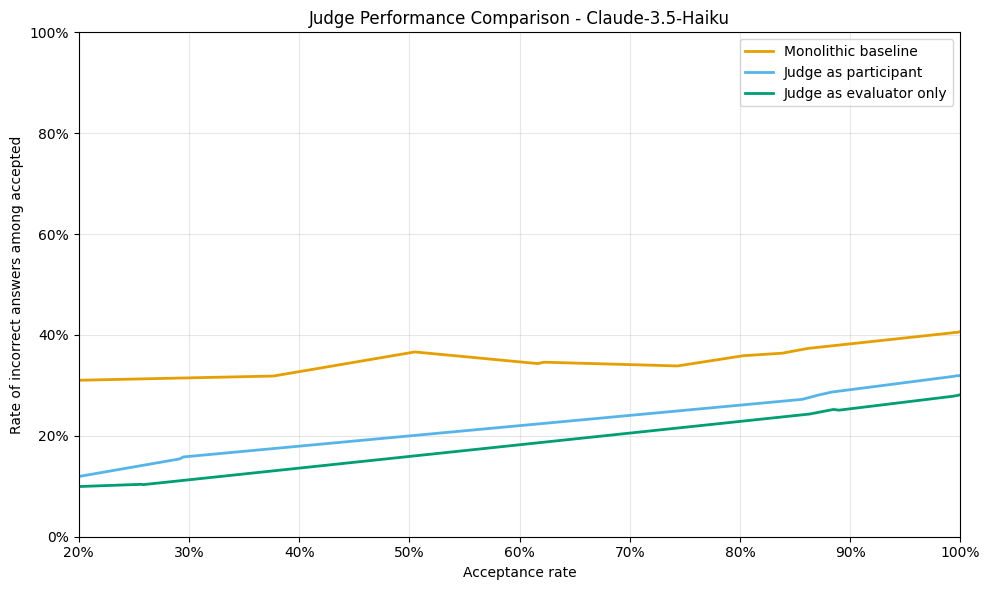

Plot saved to: judge_comparison_Claude-35-Haiku.png


In [10]:
results = plot_judge_comparison(
    df_claude_mono, 
    df_claude_judge_participant, 
    df_claude_judge_evaluator,
    model_name="Claude-3.5-Haiku"
)

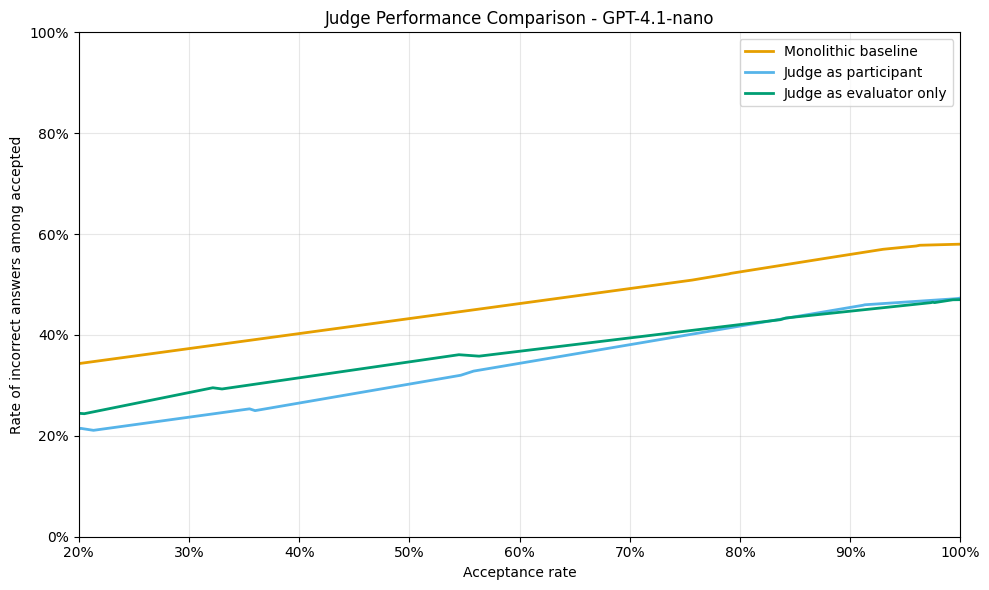

Plot saved to: judge_comparison_GPT-41-nano.png


In [11]:
results = plot_judge_comparison(
    df_gpt_mono, 
    df_gpt_judge_participant, 
    df_gpt_judge_evaluator,
    model_name="GPT-4.1-nano"
)

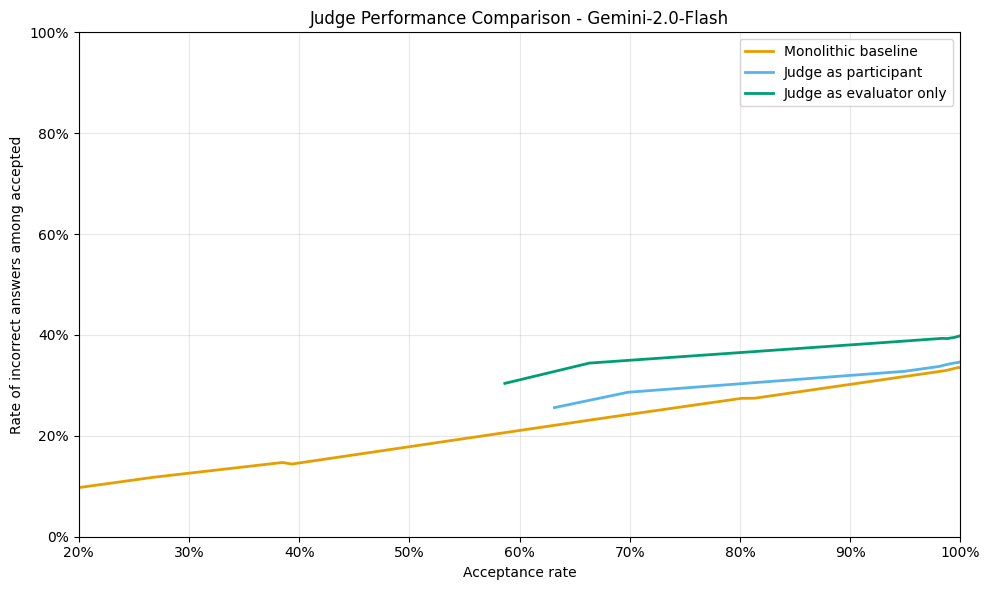

Plot saved to: judge_comparison_Gemini-20-Flash.png


In [12]:
results = plot_judge_comparison(
    df_gemini_mono, 
    df_gemini_judge_participant, 
    df_gemini_judge_evaluator,
    model_name="Gemini-2.0-Flash"
)